In [1]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import glob

# Architecture State Of Art

In [2]:
Lenet5_cifar = {'file_name' : 'Lenet5',
                  'training_time(s)' : 3234.000,
                  'test_result_loss' : 0.8703,
                  'test_result_acc' : 0.7813,
                  'train_result_acc' : 0.9308,
                  'train_result_loss' : 0.1998,
                  'nb_layers' : 11,
                  'epochs': 50,
                  'type_archi' :'LENET5'}

resnet18_cifar = {'file_name' : 'Resnet18',
                  'training_time(s)' : 3123,
                  'test_result_loss' : 0.9940,
                  'test_result_acc' : 0.6689,
                  'train_result_acc' : 0.7516,
                  'train_result_loss' : 0.7161,
                  'nb_layers' : 72,
                  'epochs': 5,
                  'type_archi': 'RESNET18'}

DenseNet_base_cifar = {'file_name' : 'DenseNet_Base',
                  'training_time(s)' : 23451.000,
                  'test_result_loss' : 0.7563,
                  'test_result_acc' : 0.7442,
                  'train_result_acc' : 0.7066,
                  'train_result_loss' : 1.2783,
                  'nb_layers' : 92,
                  'epochs': 50,
                  'type_archi': 'DENSENET_BASE'}

DenseNet121_cifar = {'file_name' : 'DenseNet121',
                  'training_time(s)' : 8261.000,
                  'test_result_loss' : 0.7479,
                  'test_result_acc' : 0.7355,
                  'train_result_acc' : 0.6100,
                  'train_result_loss' : 1.1291,
                  'nb_layers' : 430,
                  'epochs': 5,
                  'type_archi': 'DENSENET121'}

In [3]:
data_soa = pd.DataFrame([Lenet5_cifar, resnet18_cifar, DenseNet_base_cifar,DenseNet121_cifar], 
                        index = [0,1,2,3], 
                        columns=['file_name', 
                                 'training_time(s)', 
                                 'test_result_loss', 
                                 'test_result_acc',
                                 'train_result_acc',
                                 'train_result_loss',
                                 'nb_layers',
                                 'epochs',
                                 'type_archi']
                       )

In [4]:
data_soa

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
0,Lenet5,3234.0,0.8703,0.7813,0.9308,0.1998,11,50,LENET5
1,Resnet18,3123.0,0.9940,0.6689,0.7516,0.7161,72,5,RESNET18
2,DenseNet_Base,23451.0,0.7563,0.7442,0.7066,1.2783,92,50,DENSENET_BASE
3,DenseNet121,8261.0,0.7479,0.7355,0.6100,1.1291,430,5,DENSENET121


<function matplotlib.pyplot.show(close=None, block=None)>

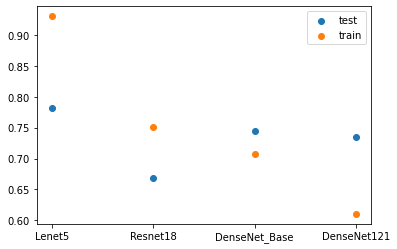

In [5]:
plt.scatter(data_soa['file_name'], data_soa['test_result_acc'], label="test")
plt.scatter(data_soa['file_name'], data_soa['train_result_acc'], label="train")

plt.legend()
plt.show

# Architecture Data

In [6]:
data = pd.read_csv('architecture_results_v3.csv')

In [7]:
data

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
0,archi_v3_1,137.961022,0.172679,0.9430,0.946383,0.158794,32,5,RESNET
1,archi_v3_2,34.092646,1.177252,0.5959,0.593417,1.198786,5,5,DENSENET
2,archi_v3_3,70.545813,0.560783,0.7953,0.786633,0.594876,25,5,ALL
3,archi_v3_4,32.900410,1.212360,0.5561,0.556550,1.236942,7,5,LENET
4,archi_v3_5,156.514521,3.457778,0.3775,0.374550,3.523504,56,5,ALL
...,...,...,...,...,...,...,...,...,...
125,archi_v3_26,31336.990428,0.951687,0.6860,0.774720,0.650571,150,46,ALL
126,archi_v3_27,9277.585848,0.923450,0.7062,0.805240,0.556456,21,40,RESNET
127,archi_v3_28,2306.373430,2.107339,0.2424,0.249240,2.103191,35,21,DENSENET
128,archi_v3_29,9218.773742,1.472378,0.5717,0.815520,0.550080,114,42,ALL


# experiment 1 : State Machine v3

In [34]:
test1 = data[:10]

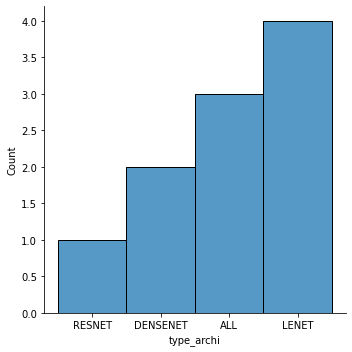

In [35]:
sns.displot(test1, x="type_archi")

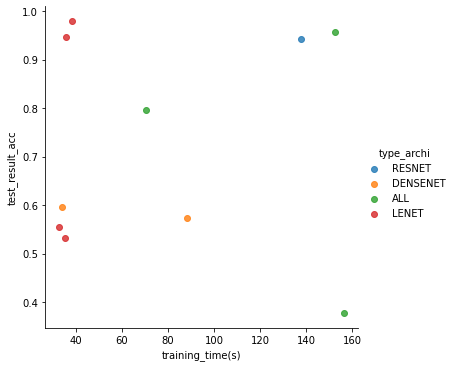

In [36]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test1,
    hue='type_archi',
    fit_reg=False
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

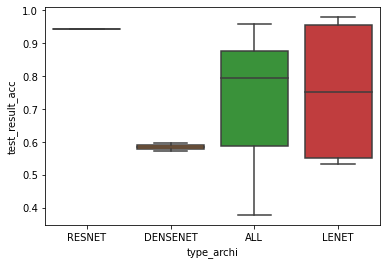

In [37]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test1)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

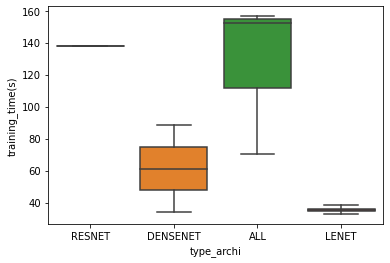

In [38]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test1)

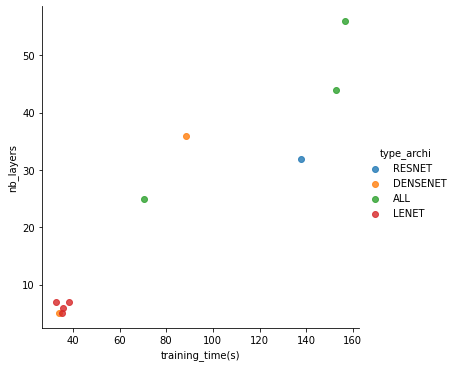

In [39]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test1,
    fit_reg=False,
    hue='type_archi'
)

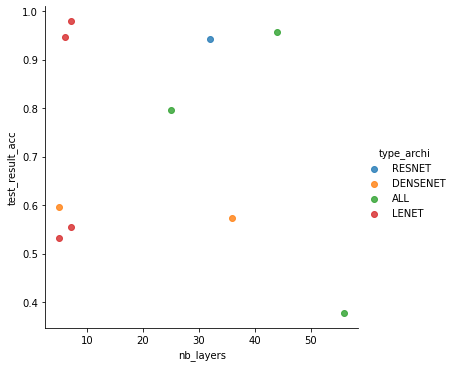

In [40]:
sns.lmplot(
    x='nb_layers',
    y='test_result_acc',
    data=test1,
    fit_reg=False,
    hue='type_archi'
)

# experiment 2 : block

In [13]:
test2 = data[10:40]

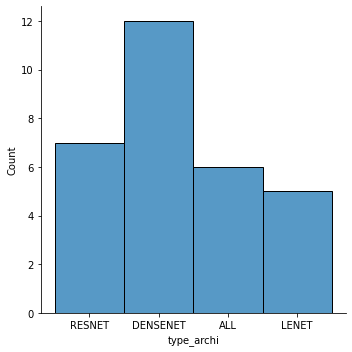

In [46]:
sns.displot(test2, x="type_archi")

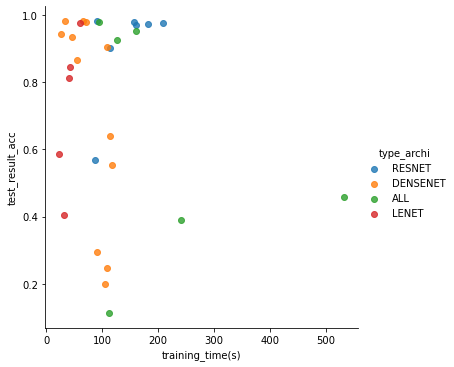

In [47]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test2,
    hue='type_archi',
    fit_reg=False
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

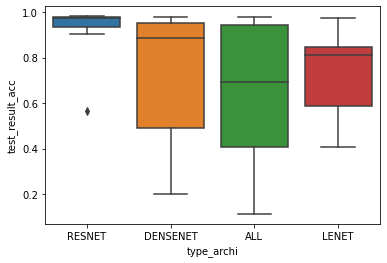

In [48]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test2)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

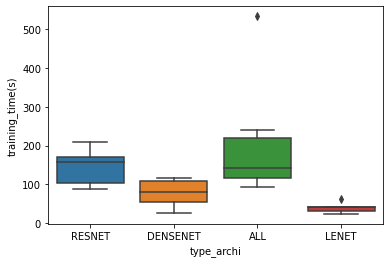

In [49]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test2)

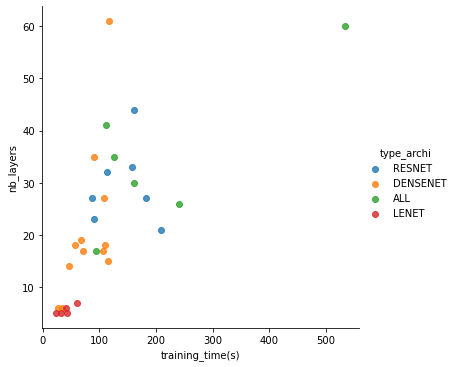

In [54]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test2,
    fit_reg=False,
    hue='type_archi'
)

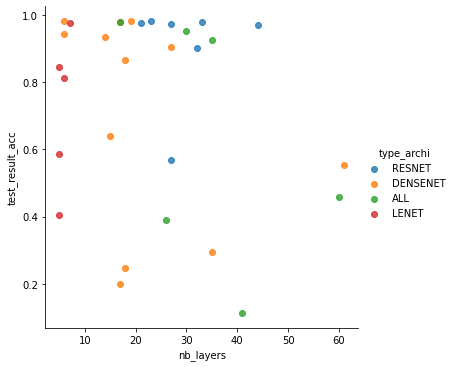

In [51]:
sns.lmplot(
    x='nb_layers',
    y='test_result_acc',
    data=test2,
    fit_reg=False,
    hue='type_archi'
)

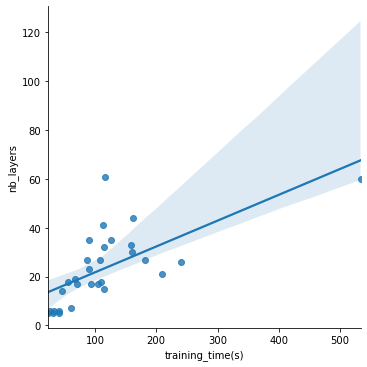

In [14]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test2,
    fit_reg=True
)

# experiment 3 : Cifar

In [17]:
test3 = data[40:70]

In [18]:
test3

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
40,archi_v3_1,114.101931,1.460473,0.4703,0.48020,1.441289,32,5,RESNET
41,archi_v3_2,46.496251,1.803117,0.3246,0.32260,1.803775,18,5,DENSENET
42,archi_v3_3,80.009860,1.296909,0.5268,0.55216,1.225355,23,5,RESNET
43,archi_v3_4,188.287363,1.444496,0.4808,0.49434,1.414573,30,5,ALL
44,archi_v3_5,299.288743,1.937277,0.2170,0.21784,1.934680,26,5,ALL
45,archi_v3_6,89.250098,2.255981,0.1158,0.11548,2.257101,19,5,DENSENET
46,archi_v3_7,208.247876,1.265950,0.5530,0.58008,1.178796,31,5,RESNET
47,archi_v3_8,150.352577,2.031523,0.1887,0.18898,2.035775,41,5,ALL
48,archi_v3_9,67.913760,1.456546,0.4797,0.50096,1.407333,7,5,LENET
49,archi_v3_10,47.467861,1.685498,0.3767,0.37402,1.687152,6,5,LENET


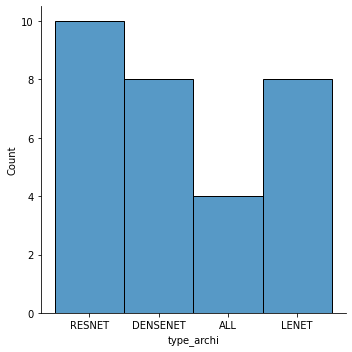

In [5]:
sns.displot(test3, x="type_archi")

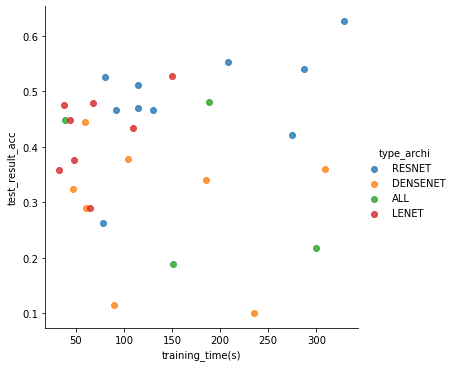

In [6]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test3,
    hue='type_archi',
    fit_reg=False
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

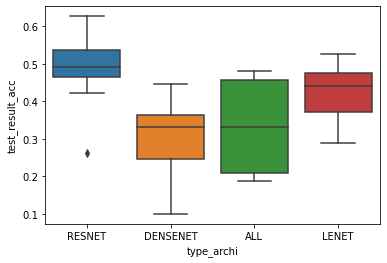

In [7]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test3)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

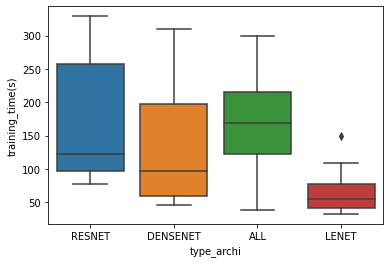

In [8]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test3)

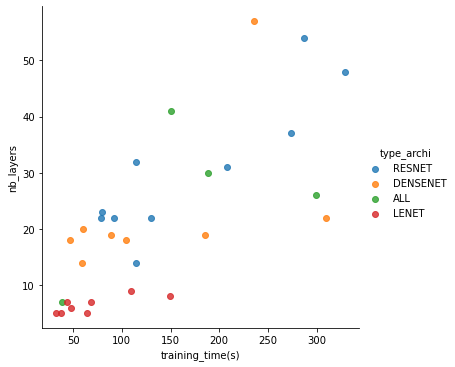

In [10]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test3,
    fit_reg=False,
    hue='type_archi'
)

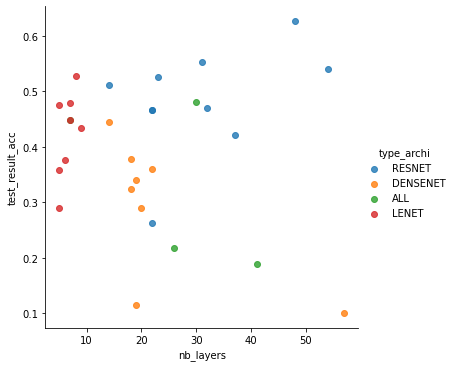

In [11]:
sns.lmplot(
    x='nb_layers',
    y='test_result_acc',
    data=test3,
    fit_reg=False,
    hue='type_archi'
)

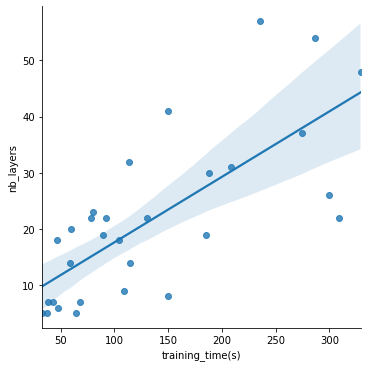

In [12]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test3,
    fit_reg=True
)

# Experiment 4 : Epochs
- more epochs (max 50)
- earlystopping

In [4]:
test4 = data[70:100]

In [5]:
test4

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
70,archi_v3_1,798.351023,1.289643,0.5326,0.57008,1.183775,32,34,RESNET
71,archi_v3_2,171.644020,1.749008,0.3465,0.34034,1.746196,18,14,DENSENET
72,archi_v3_3,627.813203,1.313787,0.5549,0.68076,0.902783,23,39,RESNET
73,archi_v3_4,749.831077,1.236278,0.5595,0.62448,1.058717,30,30,ALL
74,archi_v3_5,191.680154,1.929973,0.2138,0.21534,1.932666,26,10,ALL
75,archi_v3_6,177.881168,2.213312,0.1292,0.12836,2.210249,19,19,DENSENET
76,archi_v3_7,818.211906,1.340803,0.5474,0.69816,0.853304,31,50,RESNET
77,archi_v3_8,283.723264,1.933496,0.2081,0.20686,1.936604,41,18,ALL
78,archi_v3_9,276.185378,1.512171,0.4939,0.63846,1.028738,7,45,LENET
79,archi_v3_10,109.447790,1.628932,0.4086,0.40380,1.619255,6,20,LENET


<function matplotlib.pyplot.show(close=None, block=None)>

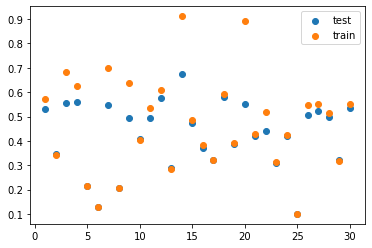

In [6]:
plt.scatter(range(1,31), test4['test_result_acc'], label="test")
plt.scatter(range(1,31), test4['train_result_acc'], label="train")

plt.legend()
plt.show

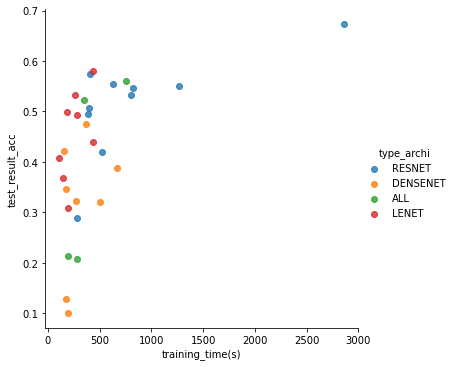

In [7]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test4,
    hue='type_archi',
    fit_reg=False
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

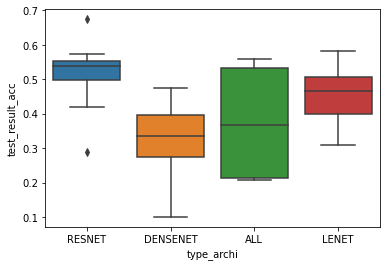

In [8]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test4)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

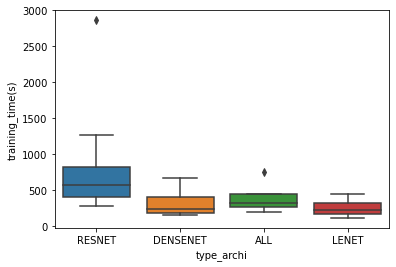

In [9]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test4)

# Experiment 5 : Densenet
- modification DenseNet :
    - add num denseBlock
    - modification num of layer in denseBlock

In [8]:
test5 = data[100:130]

In [9]:
test5

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
100,archi_v3_1,1525.798082,1.350952,0.5952,0.81200,0.550849,34,39,RESNET
101,archi_v3_2,713.016974,1.371146,0.4994,0.50890,1.359286,20,43,DENSENET
102,archi_v3_3,1118.127618,2.363658,0.6085,0.92128,0.342187,23,34,RESNET
103,archi_v3_4,5339.603906,2.150796,0.6389,0.94306,0.274311,82,37,ALL
104,archi_v3_5,660.574110,1.235836,0.5544,0.58442,1.164664,6,45,LENET
105,archi_v3_6,292.312238,1.607489,0.4513,0.56824,1.215557,6,50,LENET
106,archi_v3_7,2249.263631,2.171115,0.5231,0.90214,0.367776,38,38,RESNET
107,archi_v3_8,449.232497,1.451863,0.4806,0.48198,1.437066,38,25,ALL
108,archi_v3_9,7460.120119,0.794932,0.7582,0.87818,0.354245,42,42,DENSENET
109,archi_v3_10,317.095489,1.355382,0.5159,0.53634,1.299482,6,50,LENET


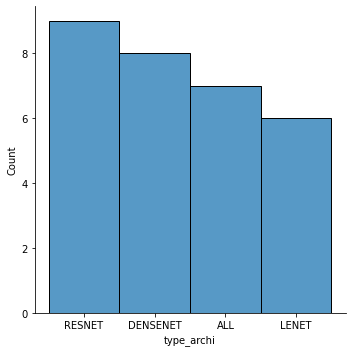

In [10]:
sns.displot(test5, x="type_archi")

In [11]:
test5_soa = pd.concat([test5, data_soa])

<function matplotlib.pyplot.show(close=None, block=None)>

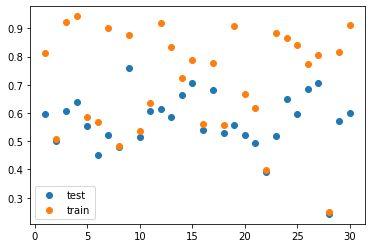

In [12]:
plt.scatter(range(1,len(test5)+1), test5['test_result_acc'], label="test")
plt.scatter(range(1,len(test5)+1), test5['train_result_acc'], label="train")

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

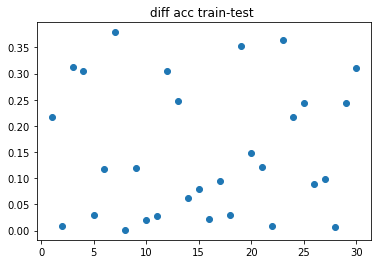

In [13]:
plt.scatter(range(1,len(test5)+1), test5['train_result_acc']-test5['test_result_acc'])

plt.title("diff acc train-test ")
plt.show

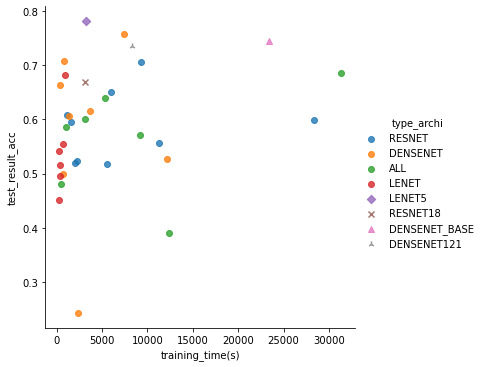

In [14]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test5_soa,
    hue='type_archi',
    fit_reg=False,
    markers=["o", "o","o" ,"o" ,"D", "x", "^", "2"]
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

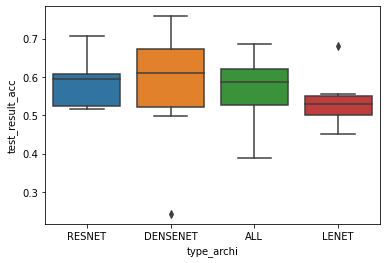

In [15]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test5)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

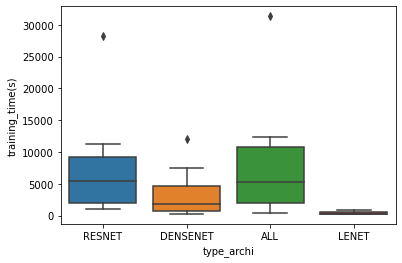

In [16]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test5)

<AxesSubplot:xlabel='type_archi', ylabel='epochs'>

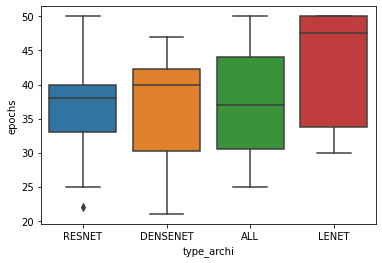

In [17]:
sns.boxplot(y='epochs', x='type_archi', data=test5)